# Introduction to Data Science – Networks
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/* 

In this lecture, we explore how to work with graphs (networks) in Python. We will use the [NetworkX](https://networkx.org/) library. 

Alternative libraries are [graph-tool](https://graph-tool.skewed.de) and [iGraph](http://igraph.org/). We have chosen NetworkX because it's native Python and hence easy to install. Graph-tool is said to be faster, but requires manual installation. 

NetworkX supports four types of graphs as objects: 

 * **Graph:** This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.
 * **DiGraph:** Directed graphs, that is, graphs with directed edges. 
 * **MultiGraph:** A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.
 * **MultiDiGraph:** A directed version of a MultiGraph.
 

We start off by creating a simple graph containing scholars, and connect the authors based on co-authored publications.  We can use the `add_node()` and `add_edge()` functions to add the respective entities. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
#initailize the graph
authors=nx.Graph()
# add nodes
authors.add_node("Alex")
authors.add_node("Marc")
authors.add_node("Wolfgang")
authors.add_node("Helwig")

# add edges
authors.add_edge("Alex", "Marc")
authors.add_edge("Marc", "Wolfgang")
authors.add_edge("Marc", "Helwig")
authors.add_edge("Helwig", "Alex")

print(list(authors.nodes()))
print(list(authors.edges()))

['Alex', 'Marc', 'Wolfgang', 'Helwig']
[('Alex', 'Marc'), ('Alex', 'Helwig'), ('Marc', 'Wolfgang'), ('Marc', 'Helwig')]


In [3]:
# The node Hanspeter didn't exist before
authors.add_edge("Alex", "Hanspeter")
authors.add_edge("Helwig", "Hanspeter")
print(list(authors.nodes()))
print(list(authors.edges()))

['Alex', 'Marc', 'Wolfgang', 'Helwig', 'Hanspeter']
[('Alex', 'Marc'), ('Alex', 'Helwig'), ('Alex', 'Hanspeter'), ('Marc', 'Wolfgang'), ('Marc', 'Helwig'), ('Helwig', 'Hanspeter')]


We can add attributes of various types, including basic data types, lists, dictionaries:

In [4]:
authors.nodes["Hanspeter"]["Institution"] = "Harvard"
authors.nodes["Alex"]["Institution"] = "UofU"
authors.nodes["Marc"]["Institution"] = ["JKU", "datavisyn"]
nx.get_node_attributes(authors, "Institution")

{'Alex': 'UofU', 'Marc': ['JKU', 'datavisyn'], 'Hanspeter': 'Harvard'}

We can access individual nodes:

In [5]:
authors.nodes(data=True)

NodeDataView({'Alex': {'Institution': 'UofU'}, 'Marc': {'Institution': ['JKU', 'datavisyn']}, 'Wolfgang': {}, 'Helwig': {}, 'Hanspeter': {'Institution': 'Harvard'}})

In [6]:
authors.nodes["Marc"]

{'Institution': ['JKU', 'datavisyn']}

And the neighbors of nodes:

In [7]:
authors["Marc"]

AtlasView({'Alex': {}, 'Wolfgang': {}, 'Helwig': {}})

## Visualizing the Graph

NetworkX isn't a particular good graph visualization library. For good graph visualization, take a look at [D3](https://d3js.org/) if you want to write JavaScript code, [GraphViz](https://graphviz.org), if you want to generate a static graph as a PDF or image, or [Cytoscape](http://www.cytoscape.org/) or [Gephi](https://gephi.org/) if you want a GUI tool.

Note that GraphViz has had several Python wrappers over time, some which have been quite serviceable. However, they rapidly change in terms of maintenance.

We'll make due with NetworkX's vis capabilities first though. NetworkX uses Matploltlib to draw it's graph. 

Let's start with a force-directed layout:

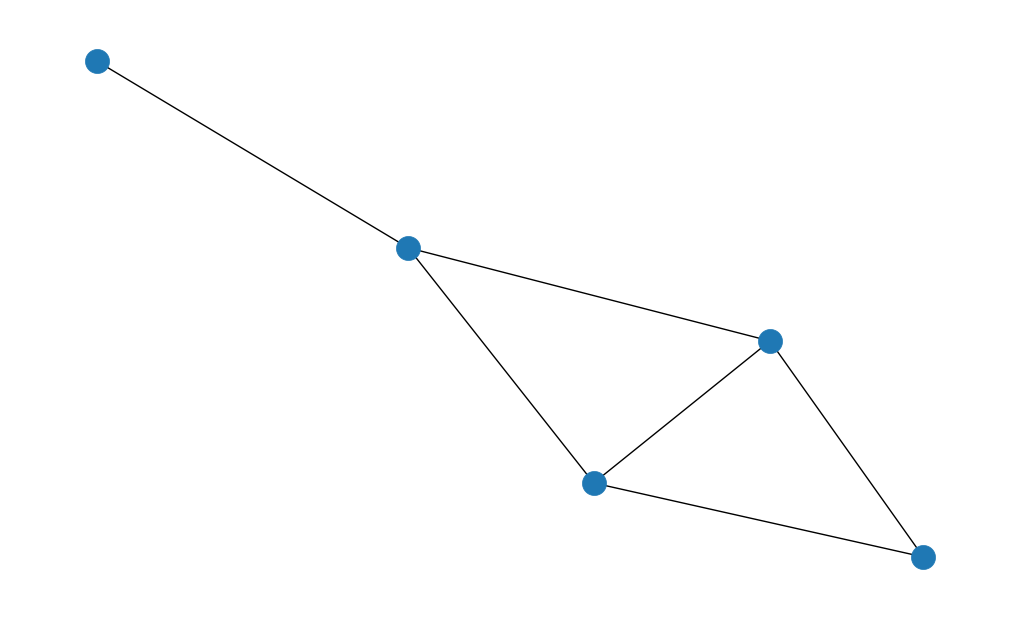

In [8]:
# use a spring layout to calculate positions and plot them
nx.draw_spring(authors)
plt.show()

This clearly shows us the topology, but we want also to know who is who, so we add labels:

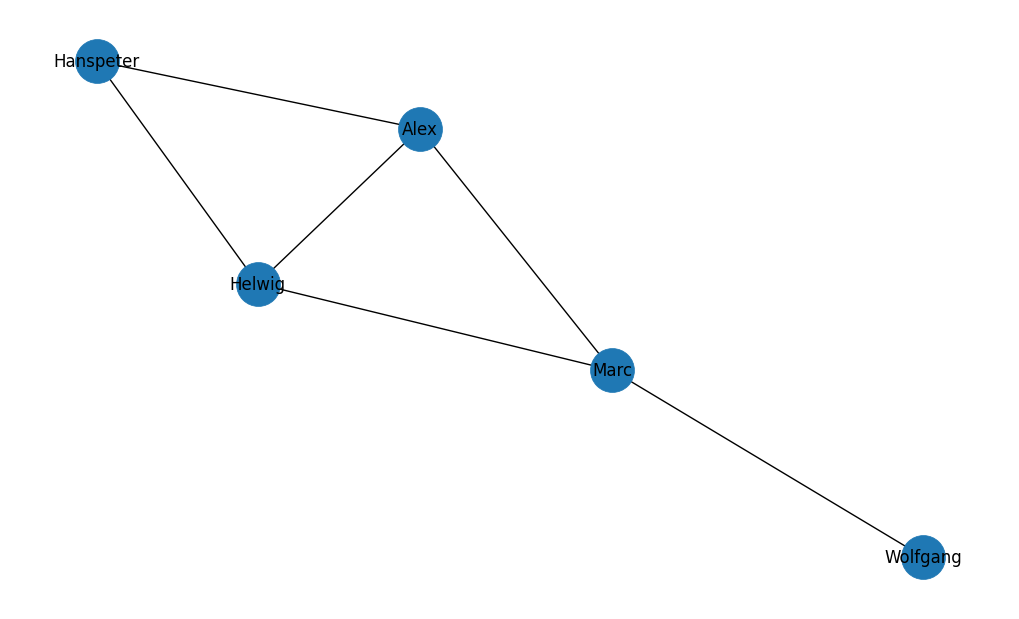

In [9]:
# Here we calculate the layout positions first
pos = nx.spring_layout(authors)
# and then pass the positions to the drawing function
nx.draw(authors, pos=pos, node_size=1000)
# then we draw the labels at the same position
nx.draw_networkx_labels(authors, pos=pos)
plt.show()

Alternatively we can use a shell layout, that places the nodes on a circle/ellipsoid:

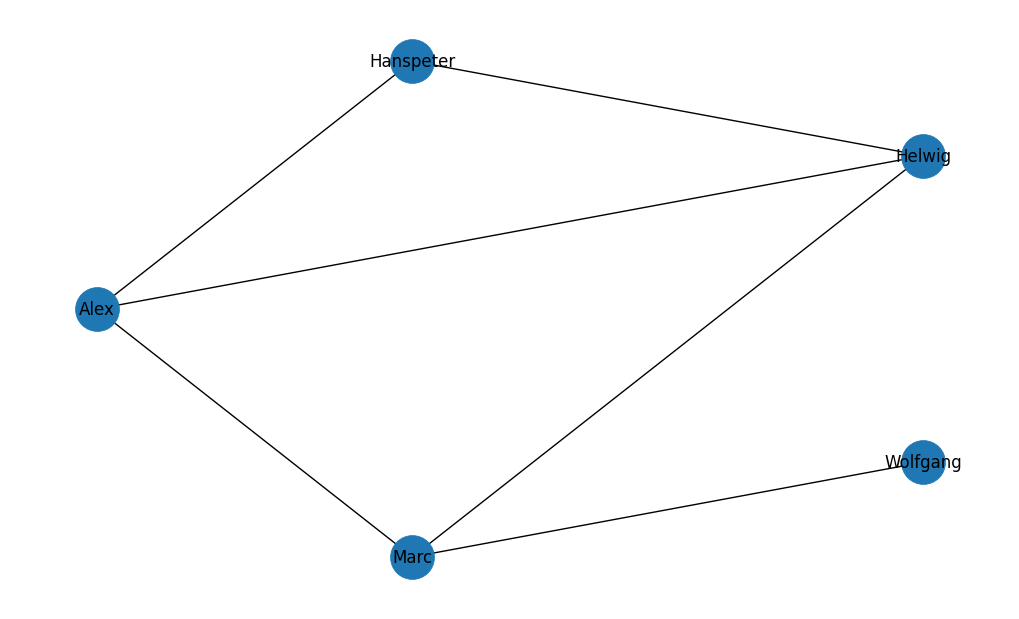

In [10]:
pos = nx.shell_layout(authors)
nx.draw(authors, pos=pos, node_size=1000)
nx.draw_networkx_labels(authors, pos=pos)
plt.show()

NetworkX does support a couple of other node-link layouts, but it does not support matrix layouts. 

## Basic Stats

Let's take a look at a couple of basic stats about the network.

In [11]:
print("Number of nodes:", nx.number_of_nodes(authors))
print("Number of edges:", nx.number_of_edges(authors))

Number of nodes: 5
Number of edges: 6


We can look at the degree of each node:

In [12]:
degree = nx.degree(authors)
degree

DegreeView({'Alex': 3, 'Marc': 3, 'Wolfgang': 1, 'Helwig': 3, 'Hanspeter': 2})

And we can visualize these degrees as the size of the nodes. First, a helper function to draw the network:

In [13]:
def draw_network(network, weights):
    """Draws a network using force directed layout where the nodes are scaled by the weight"""
    pos = nx.spring_layout(network)
    nx.draw(network, pos=pos, node_size=weights)
    nx.draw_networkx_labels(network, pos=pos)
    plt.show()

And then we need to rescale the node size by a factor, so that it's visible:

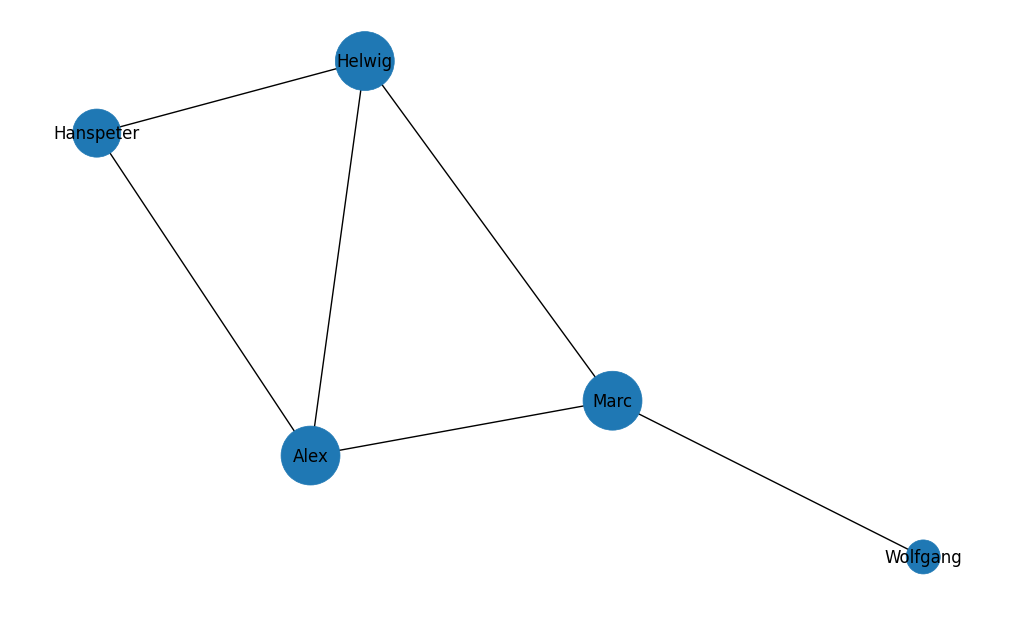

In [14]:
scaled_degree = []
for author in authors.nodes():
    scaled_degree.append(degree[author]*600)

draw_network(authors, scaled_degree)

It is also trivial to show a degree histogram. Remember, that degree histograms tell us a lot about the network.

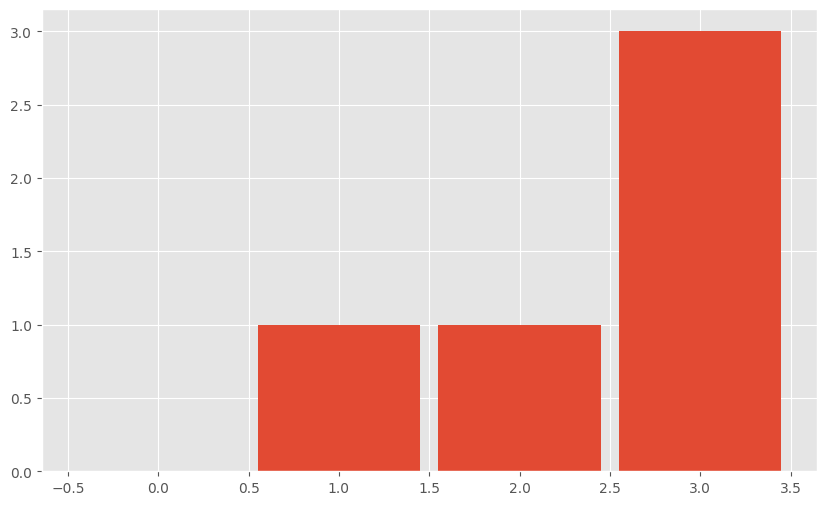

In [15]:
plt.rcParams['figure.figsize'] = (10, 6)
counts = nx.degree_histogram(authors)
bins = range(len(counts))
plt.bar(bins, counts, width=0.9)
plt.show()

For this network, that's not particularly interesting, but we'll take a look at a larger graph next.

## Importing and Generating Graphs

There are various ways to [generate simulated graphs](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), which are great if you want to try out an algorithm or a visualization method. NetworkX also comes with a set of [pre-loaded graphs](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html#module-networkx.generators.social). 

We'll use data based on character co-appearance in Victor Hugo's Les Misérables, compiled by [Donald Knuth](http://www-cs-faculty.stanford.edu/~uno/sgb.html). NetworkX supports [various formats](https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.html), including JSON, GraphML, etc. We'll use the [GML format](https://networkx.org/documentation/stable/reference/readwrite/gml.html), that looks like this:

```
{
graph [
  node [
    id 0
    label "Myriel"
  ]
  node [
    id 1
    label "Napoleon"
  ]
  node [
    id 2
    label "MlleBaptistine"
  ]
  
  ...
  
  edge [
    source 1
    target 0
    value 1
  ]
  edge [
    source 2
    target 0
    value 8
  ]
  ...
```

Importing GML is trivial if the file is properly formatted. Other formats, such as JSON, can be a little more work as they are less clearly specified. 

In [ ]:
# Read the graph file
lesmis = nx.read_gml('lesmis.gml')
# Plot the nodes
lesmis.nodes()

Let's look at the stats for this graph:

In [ ]:
print("Number of nodes:", nx.number_of_nodes(lesmis))
print("Number of edges:", nx.number_of_edges(lesmis))

In [ ]:
plt.rcParams['figure.figsize'] = (10, 15)
pos = nx.spring_layout(lesmis)
nx.draw(lesmis, pos=pos)
nx.draw_networkx_labels(lesmis, pos=pos)
plt.show()

## Connectedness Measures

Connectedness measures provide information about the relative roles of nodes in a graph. This is important, for example, to rank nodes, or to identify nodes that important hubs in a network. We'll look at three measures: degree, betweenness centrality, and page rank. 

Here we write a helper function that allows us to plot with weights:

In [ ]:
def draw_network_fancy(graph, weights, drawing_factor, figsize=(10,15), layout_type='spring'):
    """Draws a network where the nodes are scaled by weights and a factor"""
    node_scale = []
    for node in graph.nodes():
        node_scale.append(weights[node]*drawing_factor)
        
    
    plt.rcParams['figure.figsize'] = figsize
    if layout_type == 'spring':
        pos = nx.spring_layout(graph)
    elif layout_type == 'shell':
        pos = nx.shell_layout(graph)
    nx.draw(graph, pos=pos, node_size=node_scale)
    nx.draw_networkx_labels(graph, pos=pos)
    plt.show()

### Degree

We first look at the degree of nodes. Degree is a local measure - we could envision one node with a large degree that is not central to the overall network. 

In [ ]:
degree = nx.degree(lesmis)
sorted(degree, key=lambda x: x[1], reverse=True)[:15]

In [ ]:
draw_network_fancy(lesmis, degree, 100)

### Betweenness centrality

The betweenness centrality of a node is a measure of how many shortest paths (of all shortest paths between all nodes) pass through that particular node. The more shortest paths that pass through the vertex, the more central the vertex is to the network. Betweenness centrality is a good measure for the overall relevance of a node in a graph.

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v

$c_B(v) =\sum_{s\ne v \ne t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$

where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths, and $\sigma(s, t|v)$ is the number of those paths passing through $v$.

This is commonly scaled by dividing through the number of pairs of nodes excluding v. 

In [ ]:
#initailize the graph
bz_demo=nx.Graph()
# add nodes
bz_demo.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
bz_demo.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('E', 'F'), ('D', 'E')])
centrality = nx.betweenness_centrality(bz_demo)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
draw_network_fancy(bz_demo, centrality, 1000, (5,5))

In [ ]:
centrality = nx.betweenness_centrality(lesmis)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
draw_network_fancy(lesmis, centrality, 1000)

Note that computing the betwenness centrailty is expensive, it requires $\Theta(V^3)$ comparisons using the [Floyd-Warshall algorithm](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm). 

### PageRank

[PageRank](https://en.wikipedia.org/wiki/PageRank) is used by Google as part of their algorithm to rank web pages on the Internet. It treats each web page as a node and each hyperlink as an edge. PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

Another way to imagine this is if you initialize millions of people equally across all websites, and each person randomly clicks links. Important websites, or nodes will accumulate more people, and less important nodes will lose people. When this converges, the number of poeple at a node would correspond to the PageRank value.

In other words the PageRank value of a node corresponds to a probability distribution that someone clicking on random links will arrive at this page.

For example, in a network with four nodes, A, B, C and D, and three links from A->D, B->D, and C->D, the probability of clicking a link that leads to D is 1. You can think of it that initially, all pages have the same probability of 0.25, and by linking to another page they transfer their PageRank to that site. 

When a site links to multiple pages, its PageRank is evenly distributed among the sites. For example, if 
A->C, 
A->D, 
C->D, 
D->A, 
B->D,
A distributes half of it's PageRank to D, the other half to C, etc. 

This transferral is done over multiple iterations. In practice, the PageRank values can be approximated to a high degree of accuracy within only a few iterations.

When a site links to multiple pages, its PageRank is evenly distributed among the sites. For example, if 
B->C, and 
B->D, 
B distributes half of it's PageRank to D, the other half to C, etc. 

This transferral is done over multiple iterations. In practice, the PageRank values can be approximated to a high degree of accuracy within only a few iterations.

In [ ]:
#initailize the graph
abc=nx.DiGraph()
# add nodes
abc.add_node("A")
abc.add_node("B")
abc.add_node("C")
abc.add_node("D")

# add edges
abc.add_edge("B", "C")
abc.add_edge("B", "D")
abc.add_edge("C", "D")
abc.add_edge("D", "B")
abc.add_edge("A", "D")

print(list(abc.nodes()))
print(list(abc.edges()))

In [ ]:
# notice the two edges between A and D that are hard to see in this plot
weights = {'A':0.25, 'B':0.25, 'C':0.25, 'D':0.25}
draw_network_fancy(abc, weights, 2000, (5,5), layout_type='shell')
print(weights)

# Basic page rank implementation
for i in range(10):
    new_weights = {'A': 0, 'B': 0, 'C': 0, 'D':0}
    for node in abc:
        rank = weights[node]
        neighbors = abc[node]
        for n in neighbors:
            new_weights[n] += rank / len(neighbors)

    weights = new_weights
    draw_network_fancy(abc, weights, 2000, (5,5), layout_type='shell')
    print(weights)

Let's compare the result of our simple implemenation with NetworkX:

In [ ]:
abc_pr = nx.pagerank(abc, alpha=1)
draw_network_fancy(abc, abc_pr, 2000, (5,5), layout_type='shell')
print(abc_pr)

While the basic implemenatation is fairly simple, NetworkX handles edge cases ours does not. Specifically, for pages with no outbound links the PageRank algorithm assumes they link out to all other pages in the collection. 


NetworkX also supports other aspects of PageRank, such as the damping factor `alpha`. If we go back to our thought experiment with millions of internet users randomly clicking links. Here, instead of users clicking links forever they have a chance of stopping on each website. The chance of stopping is `1-alpha`. In other words, the damping factor `alpha` is the probability that a person will click the next link at each step.

In [ ]:
abc_pr = nx.pagerank(abc, alpha=0.85)
abc_pr

PageRank was designed for directed graphs. NetworkX's PageRank algorithm implementation treats undirected links as two directed links in each direction. For undirected graphs PageRank is not as valuable, as it follows the degree distribution. We can still look at the PageRank for the Les Miserables network.

In [ ]:
pr = nx.pagerank(lesmis, alpha=0.9)
sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
draw_network_fancy(lesmis, pr, 3000)

### Comparison

Let's compare the distribution of these measures.

In [ ]:
print(degree)
degrees = [d[1] for d in degree]
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(degrees)
plt.title('Histogram of Degrees')
plt.show()

In [ ]:
print(centrality.values())
centralities = centrality.values()
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(centralities)
plt.title('Histogram of Betweennes Centrality Values')
plt.show()

In [ ]:
prs = pr.values()
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(prs)
plt.title('Histogram of PageRanks')
plt.show()

### Removing Nodes

We've seen that our network is highly centralized, let's explore what would happen if we removed Valjean, the central hub of the network. You can think of this as an important employee at a company leaving, or as a central node in a computer network or electric network going offline.

In [ ]:
# new network, we might still need the old one
lesmis_cut = nx.read_gml('lesmis.gml')
lesmis_cut.remove_node("Valjean")

Let's take a look at the betweenness centrality and plot the network.

In [ ]:
cut_centrality = nx.betweenness_centrality(lesmis_cut)
sorted(cut_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
draw_network_fancy(lesmis_cut, cut_centrality, 3000)

We can see that the graph is broken off into multiple unconnected components! Valjean was an articulation point that held the network together. 

In [ ]:
nx.number_connected_components(lesmis_cut)

## Community Detection
Community detection is when you try to detect tightly knit clusters of nodes within a network, in other words a community. For example, if you consider social networks, a community might be a specific friend group. On websites this might be a collection of very related websites, such as wikipedia articles about different graph algorithms. It could also be used to identify computer generated clusters of websites that try to artificially boost their page rank by linking to each other.

NetworkX has some community detection algorithm implemented already. Here, we demonstrate using modularity algorithm to detect community in a network of how a karate club seperated. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose, which led to the split of the club into two. This is a popular example for applying community detection algorithm. 

In [ ]:
karate_club = nx.karate_club_graph() #This network is also in NetworkX already, so we can load it in directly. 
mod_com =  nx.algorithms.community.greedy_modularity_communities(karate_club)
mod_com

In [ ]:
color_map = ['Orange', 'Purple', 'Blue']

In [ ]:
pos = nx.spring_layout(karate_club)
plt.rcParams['figure.figsize'] = (12,12)
for i,c in enumerate(mod_com):
    node_list = []
    for name in c:
        node_list+=[name]
    nx.draw_networkx(karate_club,pos=pos,nodelist = node_list,node_color = color_map[i])

plt.show()

We can do the same analysis on our les mis dataset.

In [ ]:
mod_com =  nx.algorithms.community.greedy_modularity_communities(lesmis)
color_map = ['Orange', 'Purple', 'Blue', 'Red', 'Green']
pos = nx.spring_layout(lesmis)
plt.rcParams['figure.figsize'] = (12,12)
for i,c in enumerate(mod_com):
    node_list = []
    for name in c:
        node_list+=[name]
    nx.draw_networkx(lesmis,pos=pos,nodelist = node_list,node_color = color_map[i])

plt.show()

## Other Layouts

Here are some other layout examples.

You will need to install `pygraphviz` to support GraphViz layouts in NetworkX. This may require installing `graphviz` on a whole (not just for Python) on your system. You'll note some of it is now deprecated -- the issue with Python wrappers of GraphViz coming and going over time.

In [ ]:
# Let's create a simple tree and show it with the spring layout
treenet = nx.random_tree(40, seed=1)
pos = nx.spring_layout(treenet)
nx.draw_networkx(treenet, pos, node_size=50, node_color="blue", with_labels=False)
plt.show()

Here's the *dot* layout which tries to layer the network.

In [ ]:
pos = nx.nx_pydot.pydot_layout(treenet, 'dot')
nx.draw_networkx(treenet, pos, node_size=50, node_color="blue", with_labels=False)
plt.show()

Heres the *twopi* layout which places nodes on concentric rings.

In [ ]:
pos = nx.nx_pydot.pydot_layout(treenet, 'twopi')
nx.draw_networkx(treenet, pos, node_size=50, node_color="blue", with_labels=False)
plt.show()

Here's an idented tree layout.

In [ ]:
nx.write_network_text(treenet, sources=[0])

We can also use Plotly to do Treemaps and Sunbursts

In [ ]:
import plotly.express as px

# Convert to plotly form
def to_plotly_tree(graph, root):
    processed = set()
    to_process = [root]
    nodes = [root]
    parents = [""]
    while to_process:
        processing = to_process.pop(0)
        for n in graph[processing]:
            if n not in processed:
                nodes.append(n)
                to_process.append(n)
                parents.append(processing)
        processed.add(processing)
    return nodes, parents

In [ ]:
# Draw plotly treemap
nodes, parents = to_plotly_tree(treenet, 0)

fig = px.treemap(
    names = nodes,
    parents = parents
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show("notebook")

In [ ]:
sunburst_data = dict(
    nodes = nodes,
    parent= parents,
    value= [1 for x in nodes])

fig = px.sunburst(
    sunburst_data,
    names='nodes',
    parents='parent',
    values='value',
)
fig.show("notebook")

In [ ]:
tree16 = nx.random_tree(16, seed=16)
nx.write_network_text(tree16, sources=[0])

In [ ]:
nodes, parents = to_plotly_tree(tree16, 0)

fig = px.treemap(
    names = nodes,
    parents = parents
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show("notebook")

In [ ]:
sunburst_data = dict(
    nodes = nodes,
    parent= parents,
    value= [1 for x in nodes])

fig = px.sunburst(
    sunburst_data,
    names='nodes',
    parents='parent',
    values='value',
)
fig.show("notebook")